# Data Preprocessing

In [ ]:
#Importing the Dependancies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

## Loading the dataset

In [ ]:
# Loading the csv data to Pandas Dataframe
df = pd.read_csv('/content/Medicaldataset.csv')

## Overview of the Data

In [ ]:
# First five rows of the data
df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,63,1,66,160,83,160.0,1.80,0.012,negative
1,20,1,94,98,46,296.0,6.75,1.060,positive
2,56,1,64,160,77,270.0,1.99,0.003,negative
3,66,1,70,120,55,270.0,13.87,0.122,positive
4,54,1,64,112,65,300.0,1.08,0.003,negative


In [ ]:
# Columns and Rows
df.shape

(1319, 9)

## Missing values

In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Heart rate,0
Systolic blood pressure,0
Diastolic blood pressure,0
Blood sugar,0
CK-MB,0
Troponin,0
Result,0


In [ ]:
features = [ "Age", "Gender", "Heart rate", "Systolic blood pressure", "Diastolic blood pressure",
    "Blood sugar", "CK-MB", "Troponin"]

In [ ]:
#Categorical variables of Result
print("Unique values in Result column:", df['Result'].unique())

Unique values in Result column: ['negative' 'positive']


## Label Encoding

In [ ]:
# Converting categorical to numerical
df['Result'] = df['Result'].replace({'negative': 0, 'positive': 1})


<ipython-input-5-e828dd5d0b73>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Result'] = df['Result'].replace({'negative': 0, 'positive': 1})


# Undersampling

In [ ]:
# Seeing the distribution of variables in Result
df.groupby('Result').size()

,0
Result,
0,509
1,810


In [ ]:
positive = df[df.Result==1]
negative = df[df.Result==0]

In [ ]:
print(positive.shape)
print(negative.shape)

(810, 9)
(509, 9)


In [ ]:
positive_sample = positive.sample(n=509)
print(positive_sample.shape)


(509, 9)


In [ ]:

print(negative.shape)

(509, 9)


In [ ]:
new_df = pd.concat([positive_sample,negative],axis=0)

In [ ]:
new_df.groupby('Result').size() # to see whether undersampling is done

,0
Result,
0,509
1,509


# Feature Scaling

In [ ]:
features_to_scale = ['Age', 'Heart rate', 'Systolic blood pressure', 'Diastolic blood pressure',
                     'Blood sugar', 'CK-MB', 'Troponin']

In [ ]:
scaler = StandardScaler()

In [ ]:
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

In [ ]:
print(df.head())

        Age  Gender  Heart rate  Systolic blood pressure  \
0  0.499279       1   -0.239032                 1.257215   
1 -2.654832       1    0.303491                -1.117098   
2 -0.014181       1   -0.277784                 1.257215   
3  0.719333       1   -0.161529                -0.274600   
4 -0.160884       1   -0.277784                -0.580963   

   Diastolic blood pressure  Blood sugar     CK-MB  Troponin  Result  
0                  0.764927     0.178459 -0.290962 -0.302342       0  
1                 -1.872542     1.994344 -0.184072  0.605701       1  
2                  0.337229     1.647189 -0.286859 -0.310140       0  
3                 -1.230995     1.647189 -0.030324 -0.207032       1  
4                 -0.518166     2.047752 -0.306509 -0.310140       0  


# Exploratory Data Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

## Summary Statistics

In [ ]:
df.describe()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
count,1.319000e+03,1319.000000,1.319000e+03,1.319000e+03,1.319000e+03,1.319000e+03,1.319000e+03,1.319000e+03,1319.000000
mean,2.195195e-16,0.659591,5.386981e-17,-2.693490e-16,3.609277e-16,-2.033585e-16,-1.077396e-17,2.020118e-17,0.614102
std,1.000379e+00,0.474027,1.000379e+00,1.000379e+00,1.000379e+00,1.000379e+00,1.000379e+00,1.000379e+00,0.486991
min,-3.094940e+00,0.000000,-1.130320e+00,-3.261639e+00,-2.442805e+00,-1.490552e+00,-3.228992e-01,-3.118734e-01,0.000000
25%,-6.743436e-01,0.000000,-2.777839e-01,-6.575539e-01,-7.320147e-01,-6.493702e-01,-2.940930e-01,-3.075411e-01,0.000000
50%,1.325219e-01,1.000000,-8.402558e-02,-1.214187e-01,-1.918532e-02,-4.090325e-01,-2.682884e-01,-3.006095e-01,1.000000
75%,6.459818e-01,1.000000,1.291085e-01,6.061934e-01,6.223611e-01,3.053043e-01,-2.044786e-01,-2.386580e-01,1.000000
max,3.433336e+00,1.000000,2.000871e+01,3.669823e+00,5.826015e+00,5.265606e+00,6.148319e+00,8.611732e+00,1.000000


## Boxplots and Outlier Detection

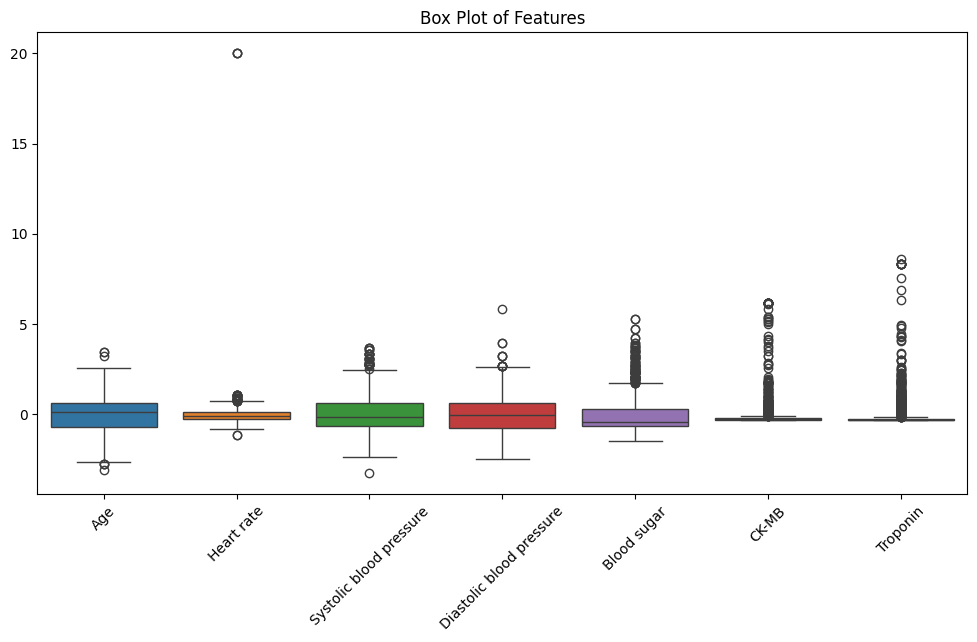

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[features_to_scale])
plt.xticks(rotation=45)
plt.title("Box Plot of Features")
plt.show()


## Correlation Heatmap

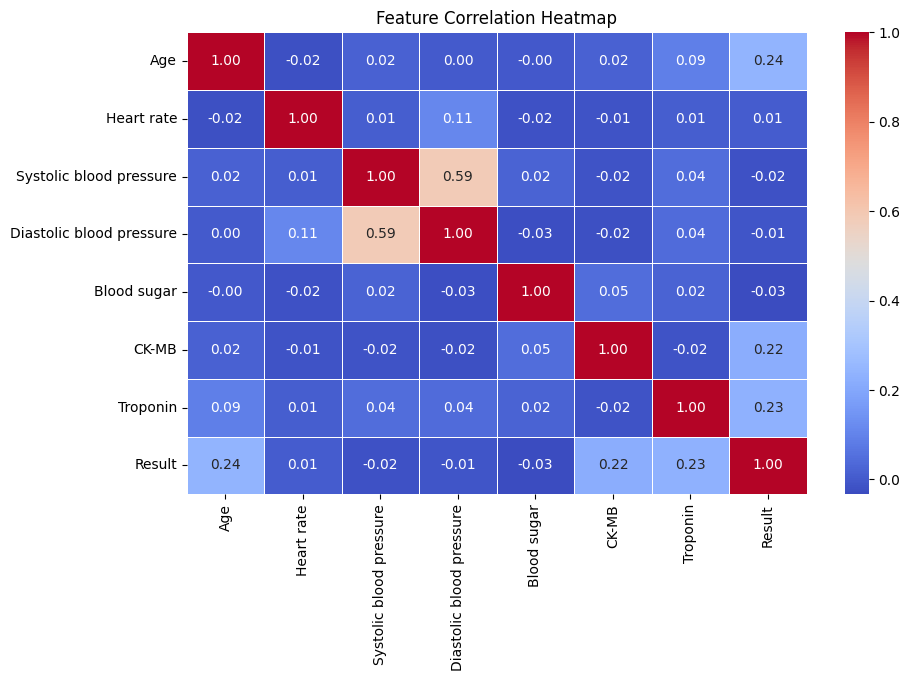

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[features_to_scale + ["Result"]].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

## Histogram

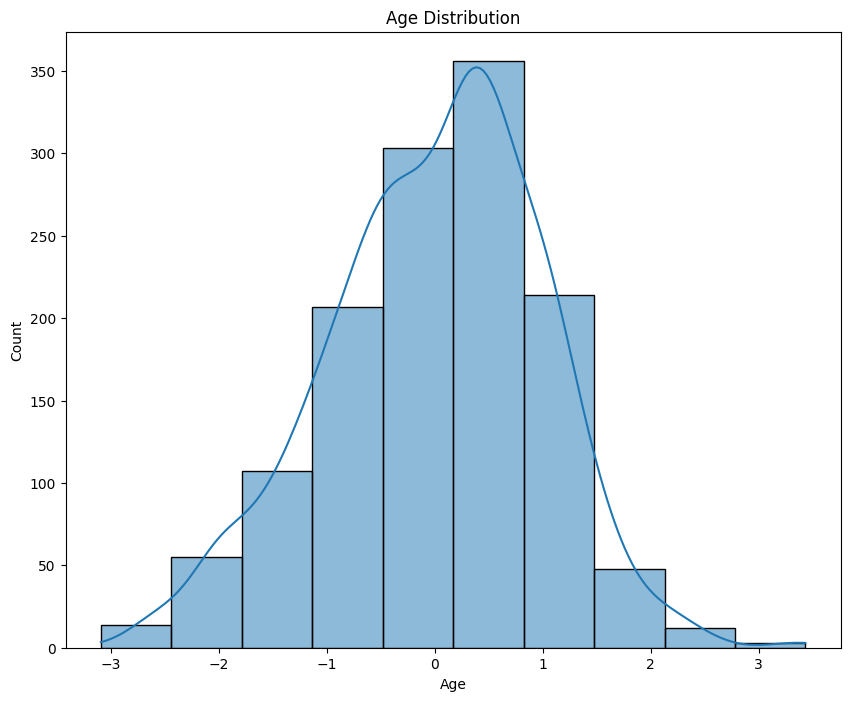

In [ ]:
plt.figure(figsize=(10, 8))
sns.histplot(df['Age'], kde=True, bins=10)
plt.title('Age Distribution')
plt.show()

## Bargraph

<ipython-input-39-11bc7206db5b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender',y='Result',data=df , palette ='pastel')


<Axes: xlabel='Gender', ylabel='Result'>

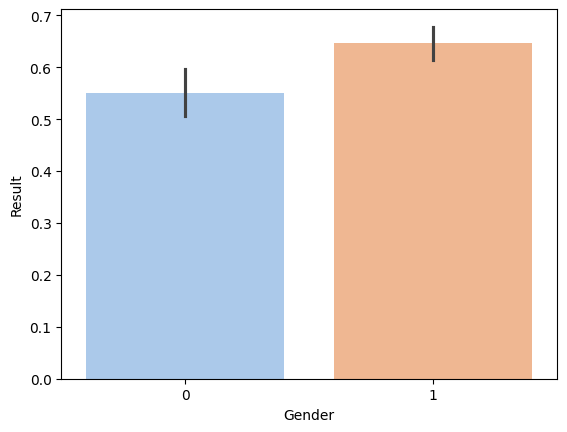

In [ ]:
sns.barplot(x='Gender',y='Result',data=df , palette ='pastel') # 1--> male and 0--> feamale

## Scatter Plot

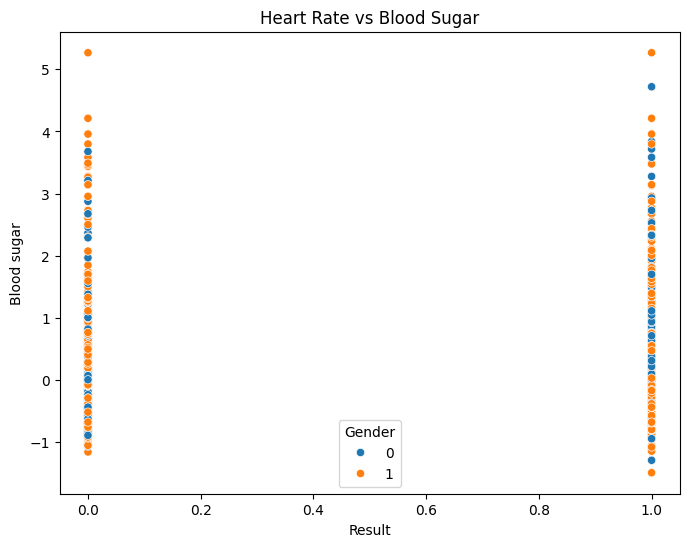

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Result', y='Blood sugar', hue='Gender', data=df)
plt.title('Heart Rate vs Blood Sugar')
plt.show()

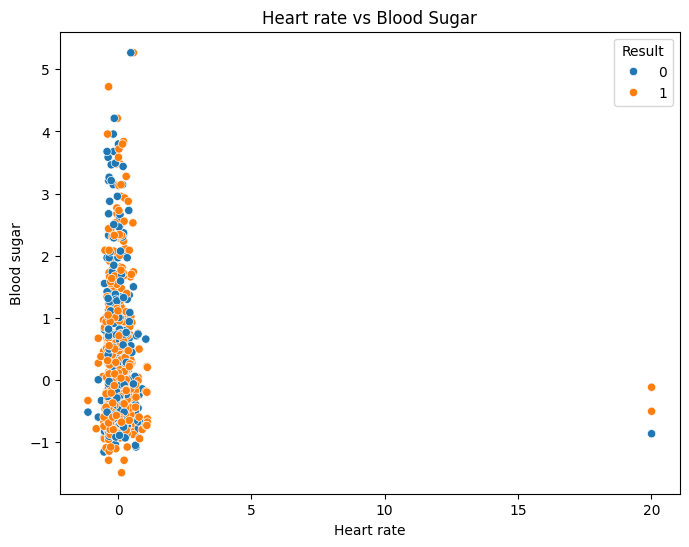

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Heart rate', y='Blood sugar', hue='Result', data=df)
plt.title('Heart rate vs Blood Sugar')
plt.show()

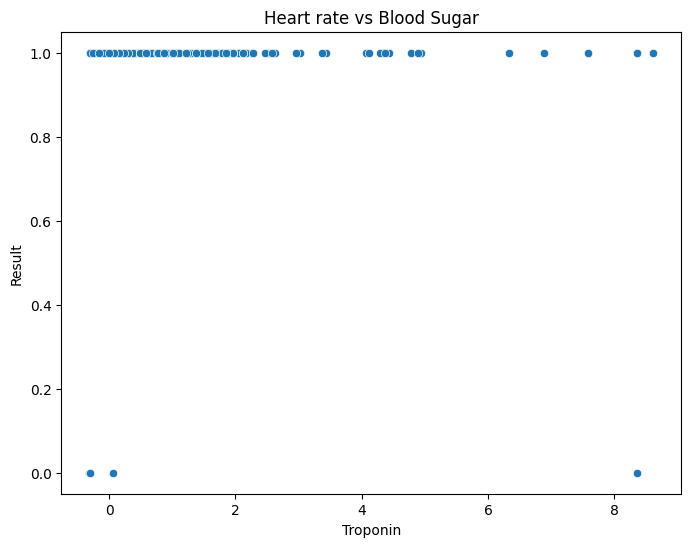

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Troponin', y='Result', data=df)
plt.title('Heart rate vs Blood Sugar')
plt.show()

## Relation Between Features

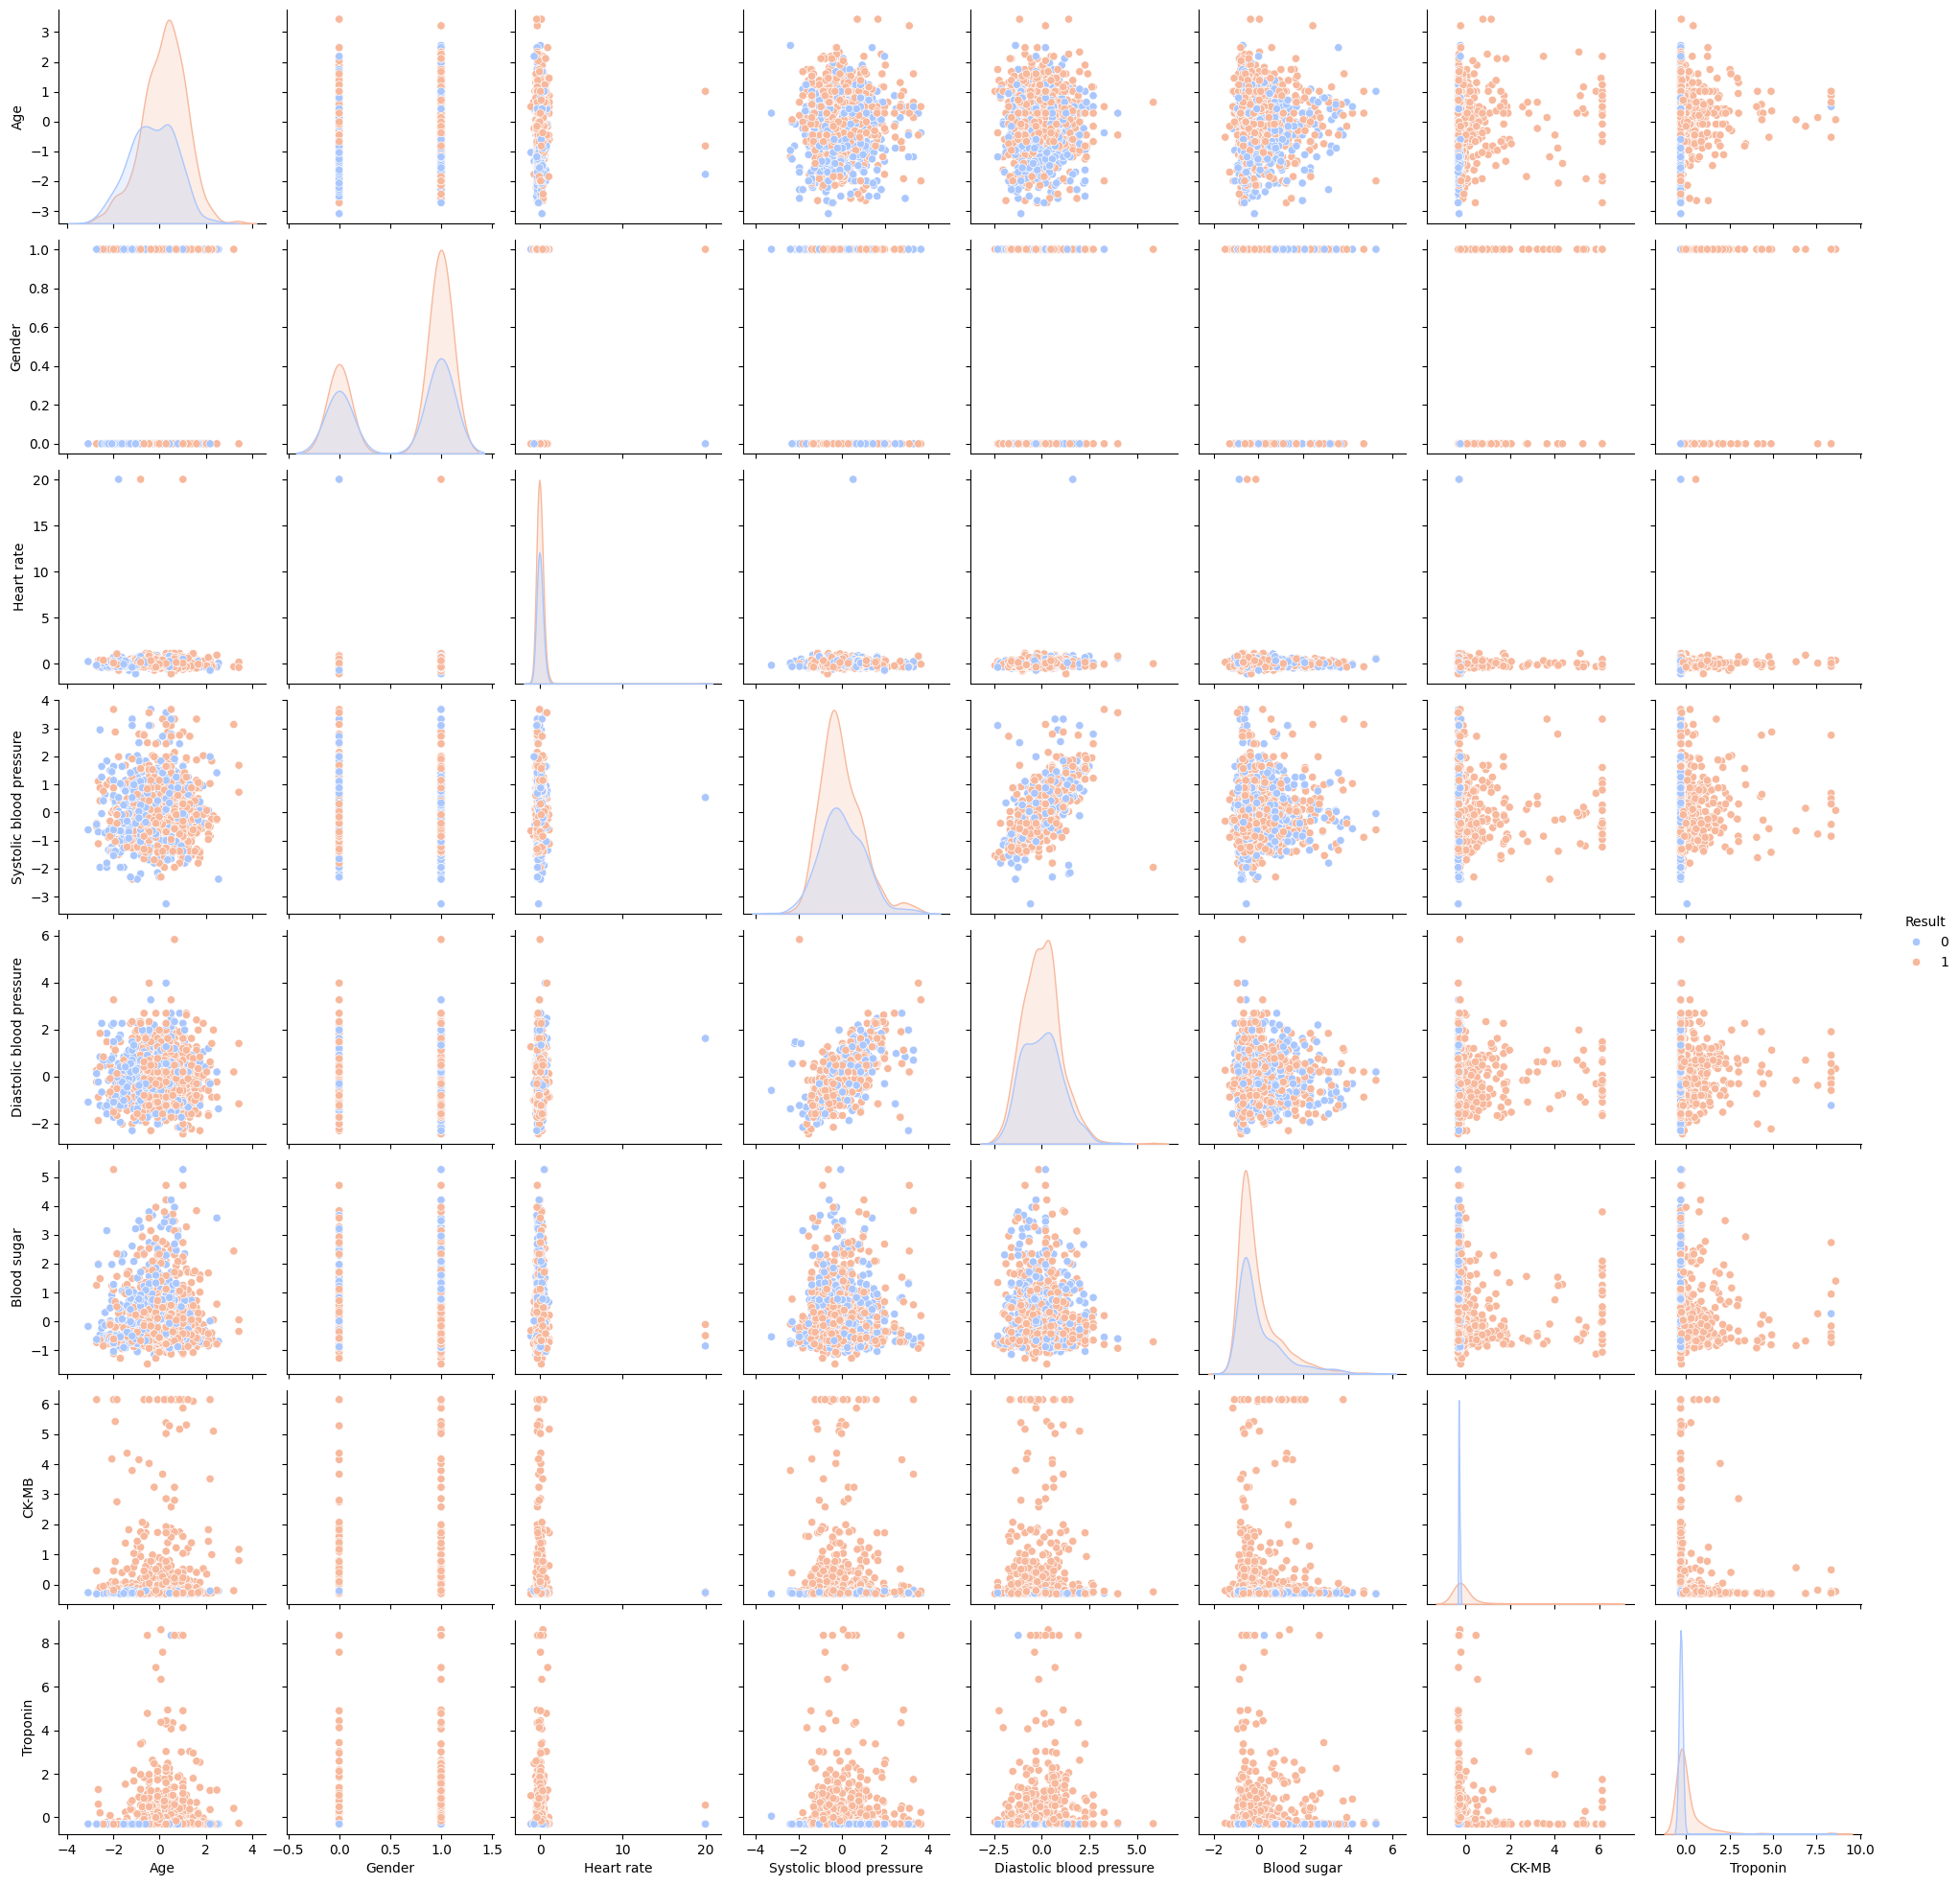

In [ ]:
sns.pairplot(df[features + ["Result"]], hue="Result", palette="coolwarm")
plt.show()

# Feature Importance

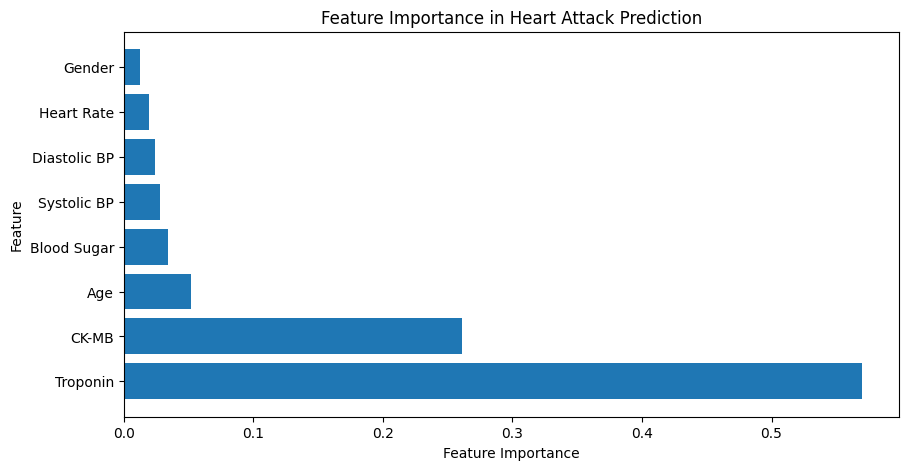

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

feature_importance = rf_model.feature_importances_
feature_names = ['Age', 'Gender', 'Heart Rate', 'Systolic BP', 'Diastolic BP', 'Blood Sugar', 'CK-MB', 'Troponin']

# Create DataFrame for feature importance
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 5))
plt.barh(feature_df['Feature'], feature_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Heart Attack Prediction')
plt.show()


# Model Selection and Training

## Splitting the Dataset

In [ ]:
x = df.drop(columns=['Result'])
y = df['Result']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Model Training

In [ ]:
# Standardize the data for models like SVM, KNN, and Logistic Regression
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Random Forest

In [ ]:
# **Random Forest Classifier**
print("Training Random Forest Classifier...")
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)
rf_y_pred = rf_model.predict(x_test)

# Evaluation
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred,pos_label=1)
rf_recall = recall_score(y_test, rf_y_pred,pos_label=1)
rf_f1 = f1_score(y_test, rf_y_pred,pos_label=1)

print(f"Random Forest - Accuracy: {rf_accuracy}, Precision: {rf_precision}, Recall: {rf_recall}, F1-Score: {rf_f1}\n")

Training Random Forest Classifier...
Random Forest - Accuracy: 0.9810606060606061, Precision: 0.9817073170731707, Recall: 0.9877300613496932, F1-Score: 0.9847094801223242



### SVM

In [ ]:
# **Support Vector Machine (SVM)**
print("Training Support Vector Machine (SVM)...")
svm_model = SVC(random_state=42)
svm_model.fit(x_train, y_train)
svm_y_pred = svm_model.predict(x_test)

# Evaluation
svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_precision = precision_score(y_test, svm_y_pred,pos_label=1)
svm_recall = recall_score(y_test, svm_y_pred,pos_label=1)
svm_f1 = f1_score(y_test, svm_y_pred,pos_label=1)

print(f"SVM - Accuracy: {svm_accuracy}, Precision: {svm_precision}, Recall: {svm_recall}, F1-Score: {svm_f1}\n")

Training Support Vector Machine (SVM)...
SVM - Accuracy: 0.7348484848484849, Precision: 0.7597765363128491, Recall: 0.8343558282208589, F1-Score: 0.7953216374269005



### Logistic Regression

In [ ]:
# **Logistic Regression**
print("Training Logistic Regression...")
lr_model = LogisticRegression(random_state=42)
lr_model.fit(x_train_scaled, y_train)
lr_y_pred = lr_model.predict(x_test_scaled)

# Evaluation
lr_accuracy = accuracy_score(y_test, lr_y_pred)
lr_precision = precision_score(y_test, lr_y_pred,pos_label=1)
lr_recall = recall_score(y_test, lr_y_pred,pos_label=1)
lr_f1 = f1_score(y_test, lr_y_pred,pos_label=1)

print(f"Logistic Regression - Accuracy: {lr_accuracy}, Precision: {lr_precision}, Recall: {lr_recall}, F1-Score: {lr_f1}\n")

Training Logistic Regression...
Logistic Regression - Accuracy: 0.7992424242424242, Precision: 0.8197674418604651, Recall: 0.8650306748466258, F1-Score: 0.8417910447761194



### KNN

In [ ]:
# **K-Nearest Neighbors (KNN)**
print("Training K-Nearest Neighbors (KNN)...")
knn_model = KNeighborsClassifier()
knn_model.fit(x_train_scaled, y_train)    # training the model
knn_y_pred = knn_model.predict(x_test_scaled)

# Evaluation
knn_accuracy = accuracy_score(y_test, knn_y_pred)
knn_precision = precision_score(y_test, knn_y_pred,pos_label=1)
knn_recall = recall_score(y_test, knn_y_pred,pos_label=1)
knn_f1 = f1_score(y_test, knn_y_pred,pos_label=1)

print(f"KNN - Accuracy: {knn_accuracy}, Precision: {knn_precision}, Recall: {knn_recall}, F1-Score: {knn_f1}\n")

Training K-Nearest Neighbors (KNN)...
KNN - Accuracy: 0.6704545454545454, Precision: 0.7235294117647059, Recall: 0.754601226993865, F1-Score: 0.7387387387387387



# Building a Predictive System

In [ ]:
import numpy as np

In [ ]:
# giving data to predict : negative case
input_data = (54,0,94,122,67,97,1.42,0.012) #arranged as per the features and values are of my own
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
std_data = scaler.transform(input_data_reshaped)
prediction =rf_model.predict(std_data) # predicting using random forest classifier
print('prediction using random forest:', prediction)

prediction using random forest: [1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# giving data to predict : positive case
input_data = (61,1,81,118,66,134,1.49,0.017) #arranged as per the features and values are of my own
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
std_data = scaler.transform(input_data_reshaped)
prediction =rf_model.predict(std_data) # predicting using random forest classifier
print('prediction using random forest:', prediction)

prediction using random forest: [1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# giving data to predict : random case not from the dataset
input_data = (50,0,70,100,50,140,0.56,0.019) #arranged as per the features and values are of my own
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
std_data = scaler.transform(input_data_reshaped)
prediction =rf_model.predict(std_data) # predicting using random forest classifier
print('prediction using random forest:', prediction)

prediction using random forest: [1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


 **CONCLUSION**

 AI-based heart attack prediction model is successfully identifying positive cases, but it struggles with correctly predicting negative cases.

 It is capable of generalizing on unseen data.

 The integration of machine learning in healthcare has great potential in predicting heart attacks early.
However, model improvement is needed to reduce false positives while maintaining accuracy.

Future improvements should include:
1)Tuning the threshold for classification to improve negative case prediction.

2)Trying alternative models (CatBoost, XGBoost, or Neural Networks) for better generalization.

3)Feature engineering to refine important predictors.

With these refinements, the AI model can become a more reliable tool for early heart attack detection, helping healthcare professionals make informed decisions. 🚀💡😊